In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from src.train import train
from src.augment import ImageBatchProcessor
from src.crop import crop_images_from_folder
from src.model import model
from src.dataset import dataset
seed = 42
image_folder = 'dataset2/train/images/'
label_folder = 'dataset2/train/labels/'
target_image_folder = 'dataset2/train/images_aug/'
target_label_folder = 'dataset2/train/labels_aug/'

In [13]:
processor = ImageBatchProcessor(image_folder, label_folder, target_image_folder, target_label_folder)
processor.augment_and_save(nb_augmentation=2)

Starting augmentation of 703 images...


PicklingError: Can't pickle <class 'src.augment.ImageBatchProcessor'>: it's not the same object as src.augment.ImageBatchProcessor

In [12]:
#crop_images_from_folder(target_image_folder, target_label_folder, 'dataset2/train/aug_cropped_images/')
crop_images_from_folder(image_folder, label_folder, 'dataset2/train/cropped_images/')
val_path = 'dataset2/val/images/'
val_label_path = 'dataset2/val/labels/'
crop_images_from_folder(val_path, val_label_path, 'dataset2/val/cropped_images/')

Cropping image in dataset2/train/images/:   3%|▎         | 22/703 [00:00<00:06, 98.43it/s] 

csv file contains only whitespace: 0353.csv


Cropping image in dataset2/train/images/:   6%|▋         | 44/703 [00:00<00:06, 103.15it/s]

csv file contains only whitespace: 0538.csv


Cropping image in dataset2/train/images/:  15%|█▌        | 107/703 [00:00<00:05, 113.63it/s]

csv_non_exists or empty：0644.csv
csv file contains only whitespace: 0378.csv


Cropping image in dataset2/train/images/:  19%|█▉        | 133/703 [00:01<00:04, 116.78it/s]

csv file contains only whitespace: 0162.csv
csv file contains only whitespace: 0194.csv


Cropping image in dataset2/train/images/:  22%|██▏       | 157/703 [00:01<00:05, 108.94it/s]

csv file contains only whitespace: 0416.csv


Cropping image in dataset2/train/images/:  28%|██▊       | 198/703 [00:01<00:04, 120.46it/s]

csv file contains only whitespace: 0661.csv
csv file contains only whitespace: 0370.csv
csv file contains only whitespace: 0600.csv


Cropping image in dataset2/train/images/:  39%|███▊      | 272/703 [00:02<00:03, 135.70it/s]

csv file contains only whitespace: 0169.csv
csv file contains only whitespace: 0549.csv


Cropping image in dataset2/train/images/:  43%|████▎     | 303/703 [00:02<00:02, 135.71it/s]

csv file contains only whitespace: 0465.csv
csv file contains only whitespace: 0768.csv
csv file contains only whitespace: 0511.csv


Cropping image in dataset2/train/images/:  50%|████▉     | 348/703 [00:02<00:02, 137.23it/s]

csv file contains only whitespace: 0052.csv
csv file contains only whitespace: 0521.csv
csv file contains only whitespace: 0167.csv
csv file contains only whitespace: 0725.csv


Cropping image in dataset2/train/images/:  55%|█████▌    | 390/703 [00:03<00:02, 133.67it/s]

csv file contains only whitespace: 0512.csv
csv file contains only whitespace: 0456.csv
csv file contains only whitespace: 0109.csv


Cropping image in dataset2/train/images/:  60%|██████    | 422/703 [00:03<00:01, 144.29it/s]

csv file contains only whitespace: 0797.csv
csv file contains only whitespace: 0728.csv
csv file contains only whitespace: 0596.csv


Cropping image in dataset2/train/images/:  64%|██████▍   | 452/703 [00:03<00:01, 138.22it/s]

csv file contains only whitespace: 0256.csv
csv_non_exists or empty：0393.csv


Cropping image in dataset2/train/images/:  68%|██████▊   | 480/703 [00:03<00:01, 132.33it/s]

csv file contains only whitespace: 0190.csv
csv file contains only whitespace: 0093.csv
csv file contains only whitespace: 0824.csv
csv file contains only whitespace: 0078.csv
csv file contains only whitespace: 0010.csv


Cropping image in dataset2/train/images/:  75%|███████▍  | 527/703 [00:04<00:01, 142.92it/s]

csv file contains only whitespace: 0305.csv
csv file contains only whitespace: 0489.csv
csv file contains only whitespace: 0281.csv
csv file contains only whitespace: 0023.csv


Cropping image in dataset2/train/images/:  82%|████████▏ | 573/703 [00:04<00:00, 141.25it/s]

csv file contains only whitespace: 0041.csv
csv file contains only whitespace: 0018.csv


Cropping image in dataset2/train/images/:  86%|████████▌ | 603/703 [00:04<00:00, 140.26it/s]

csv_non_exists or empty：0363.csv
csv file contains only whitespace: 0668.csv


Cropping image in dataset2/train/images/:  90%|█████████ | 633/703 [00:04<00:00, 141.26it/s]

csv file contains only whitespace: 0464.csv
csv file contains only whitespace: 0431.csv


Cropping image in dataset2/train/images/:  94%|█████████▍| 663/703 [00:05<00:00, 129.14it/s]

csv file contains only whitespace: 0028.csv
csv file contains only whitespace: 0408.csv
csv file contains only whitespace: 0542.csv
csv file contains only whitespace: 0016.csv


Cropping image in dataset2/train/images/: 100%|██████████| 703/703 [00:05<00:00, 128.71it/s]


csv file contains only whitespace: 0220.csv


Cropping image in dataset2/val/images/:  15%|█▍        | 13/87 [00:00<00:00, 126.47it/s]

csv file contains only whitespace: 0733.csv


Cropping image in dataset2/val/images/:  30%|██▉       | 26/87 [00:00<00:00, 125.33it/s]

csv file contains only whitespace: 0342.csv


Cropping image in dataset2/val/images/:  85%|████████▌ | 74/87 [00:00<00:00, 146.49it/s]

csv file contains only whitespace: 0745.csv
csv file contains only whitespace: 0179.csv
csv_non_exists or empty：0442.csv


Cropping image in dataset2/val/images/: 100%|██████████| 87/87 [00:00<00:00, 136.42it/s]


In [4]:
val_path = 'dataset2/val/cropped_images/'
aug_train_path = 'dataset2/train/aug_cropped_images/'
train_path = 'dataset2/train/cropped_images/'
standard_size = (32, 32)
label_size_factor = -1
#train_data = dataset(img_dir=train_path, augment_path=aug_train_path, label_size_factor=label_size_factor, standard_size=standard_size)
#val_data = dataset(val_path, train=False, standard_size=standard_size)
test_data = dataset(train_path, standard_size= 1)



PicklingError: Can't pickle <function _load_single_image at 0x7fdc1bae9240>: it's not the same object as src.image._load_single_image

In [5]:
label_count = {}
for x in train_data.images:
    label = x.label
    if label in label_count.keys():
        label_count[label] +=1
    else:
        label_count[label] =1
label_count   

NameError: name 'train_data' is not defined

[LibSVM]......................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -0.442176, rho = -0.678506
nSV = 66, nBSV = 0
Total nSV = 66
......................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -0.450937, rho = -0.617905
nSV = 66, nBSV = 0
Total nSV = 66
......................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -0.463692, rho = -0.906052
nSV = 62, nBSV = 0
Total nSV = 62
......................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -0.525078, rho = -0.623900
nSV = 58, nBSV = 0
Total nSV = 58
......................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -0.505910, rho = -0.739576
nSV = 68, nBSV = 0
Total nSV = 68
.................

/home/alexandre/.conda/envs/sy32/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy on test data: 0.9535864978902954
Model trained with SVM with seed 42,max_iter 10000, standard_size (32, 32), label_size_factor -1
Accuracy on validation data: 0.9259259259259259


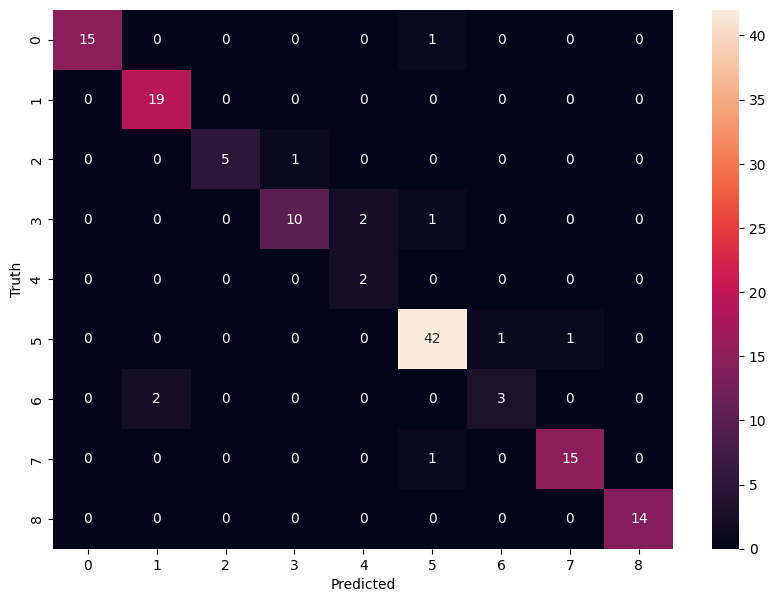

              precision    recall  f1-score   support

       ceder       1.00      0.94      0.97        16
      danger       0.90      1.00      0.95        19
     forange       1.00      0.83      0.91         6
      frouge       0.91      0.77      0.83        13
       fvert       0.50      1.00      0.67         2
interdiction       0.93      0.95      0.94        44
        none       0.75      0.60      0.67         5
  obligation       0.94      0.94      0.94        16
        stop       1.00      1.00      1.00        14

    accuracy                           0.93       135
   macro avg       0.88      0.89      0.87       135
weighted avg       0.93      0.93      0.93       135

Model accuracy with Logistic Regression: 0.9259259259259259


In [8]:
max_iter = 10000
# initialize the model
my_model = model(seed)
#my_model.train_lr(train_data, verbose=1, max_iter=max_iter)
#my_model.grid_search_svm(train_data, verbose=2, max_iter=max_iter)
my_model.train_svm(train_data, verbose=1, max_iter=max_iter)
#my_model.train_OneVsRest(train_data, verbose=1, max_iter=max_iter)
#my_model.plot_learning_curve(train_data, verbose=1)
print(f"Model trained with {my_model.name} with seed {seed},max_iter {max_iter}, standard_size {standard_size}, label_size_factor {label_size_factor}")
# evaluate the model
accuracy = my_model.evaluate(val_data)
print("Model accuracy with Logistic Regression: {}".format(accuracy))

In [14]:
my_model.save("src/models")


Accuracy on validation data: 0.9259259259259259


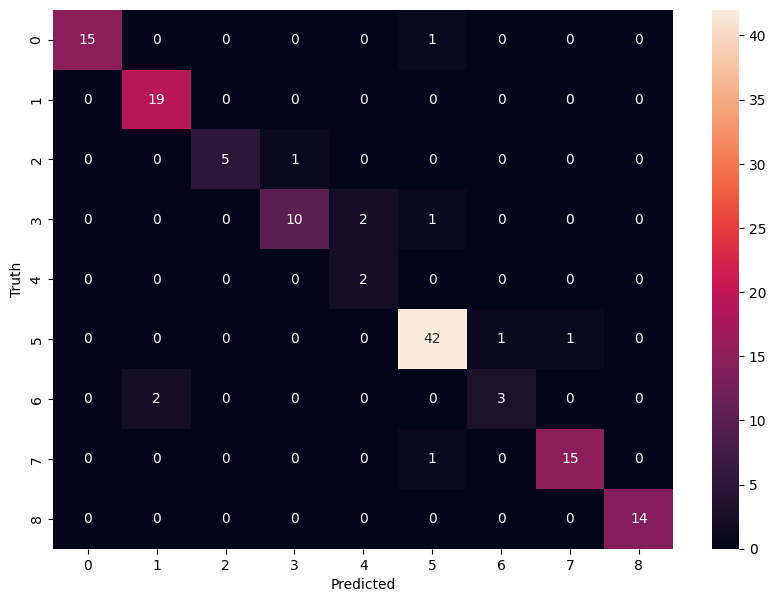

              precision    recall  f1-score   support

       ceder       1.00      0.94      0.97        16
      danger       0.90      1.00      0.95        19
     forange       1.00      0.83      0.91         6
      frouge       0.91      0.77      0.83        13
       fvert       0.50      1.00      0.67         2
interdiction       0.93      0.95      0.94        44
        none       0.75      0.60      0.67         5
  obligation       0.94      0.94      0.94        16
        stop       1.00      1.00      1.00        14

    accuracy                           0.93       135
   macro avg       0.88      0.89      0.87       135
weighted avg       0.93      0.93      0.93       135

Model accuracy with Logistic Regression: 0.9259259259259259


In [15]:
accuracy = my_model.evaluate(val_data)
print("Model accuracy with Logistic Regression: {}".format(accuracy))
